# 刘东阳 3220200915

# 数据集：Oakland Crime Statistics 2011 to 2016

### Github地址：https://github.com/lucien1998/DataMingLDY

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from fancyimpute import KNN
crime_data = pd.read_csv('records-for-2011.csv')

# 3.1 数据可视化和摘要

## 3.1.1 数据摘要

### 3.1.1（1）标称属性：

In [2]:
# Agency(每个可能取值的频数)
print(crime_data['Agency'].value_counts())

OP    180015
Name: Agency, dtype: int64


In [3]:
# Location(每个可能取值的频数)
print(crime_data['Location'].value_counts())

 INTERNATIONAL BLVD           3866
 MACARTHUR BLVD               3129
 AV&INTERNATIONAL BLVD        3067
 BROADWAY                     2132
 FOOTHILL BLVD                1791
                              ... 
APGAR RIDGEMONT DR               1
CALDERWOOD HEGENBERGER RD        1
78TH AV&NB I880                  1
73RD VIRGINIA AV                 1
COOLIDGE E 31ST ST               1
Name: Location, Length: 32505, dtype: int64


In [4]:
# Beat(每个可能取值的频数)
print(crime_data['Beat'].value_counts())

04X     7410
08X     6885
26Y     5478
30Y     5295
06X     5119
23X     5051
30X     4956
19X     4955
34X     4673
29X     4483
20X     4287
27Y     4159
07X     4134
31Y     4082
25X     4022
35X     3880
33X     3849
03X     3819
32X     3711
27X     3703
09X     3630
21Y     3435
32Y     3125
22X     3061
26X     2978
02Y     2970
10X     2967
14X     2733
03Y     2726
22Y     2664
12Y     2651
05X     2633
02X     2614
31X     2603
21X     2593
17Y     2582
24Y     2575
13Z     2546
15X     2509
24X     2459
12X     2422
10Y     2383
01X     2210
28X     2191
17X     2133
11X     2087
13Y     2017
35Y     1956
31Z     1870
18Y     1778
16Y     1561
14Y     1492
25Y     1482
13X     1122
18X     1063
16X      994
05Y      710
PDT2      20
Name: Beat, dtype: int64


In [5]:
# Incident Type Id(每个可能取值的频数)
print(crime_data['Incident Type Id'].value_counts())

933R      17348
911H      12817
SECCK     11393
415       10752
10851      7180
          ...  
140           1
591           1
970A          1
MTHLAB        1
148           1
Name: Incident Type Id, Length: 263, dtype: int64


In [6]:
# Incident Type Description(每个可能取值的频数)
print(crime_data['Incident Type Description'].value_counts())

ALARM-RINGER            17348
911 HANG-UP             12817
SECURITY CHECK          11393
STOLEN VEHICLE           7180
415 UNKNOWN              6624
                        ...  
OBSTRUCTING JUSTICE-        1
INTERFERE WITH POWER        1
CONSPIRACY COURT ORD        1
PACIFIC GAS AND ELEC        1
VEHICLE PARKED ON SI        1
Name: Incident Type Description, Length: 265, dtype: int64


### 3.1.1（2）数值属性（五数概括、缺失值个数）：points，price

In [7]:
#五数概括
crime_data.describe()

,Area Id,Priority
count,179112.000000,180015.000000
mean,1.740648,1.796111
std,0.746468,0.402916
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000


In [8]:
#缺失值个数
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180016 entries, 0 to 180015
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Create Time                180015 non-null  object 
 2   Location                   180016 non-null  object 
 3   Area Id                    179112 non-null  float64
 4   Beat                       179496 non-null  object 
 5   Priority                   180015 non-null  float64
 6   Incident Type Id           180015 non-null  object 
 7   Incident Type Description  180015 non-null  object 
 8   Event Number               180015 non-null  object 
 9   Closed Time                180009 non-null  object 
dtypes: float64(2), object(8)
memory usage: 13.7+ MB


由结果可知，总计180015条数据。<br>Area ID缺失值的个数为903。<br>Beat缺失值的个数为519。<br>CloseTime缺失值的个数为6。<br>其他数据缺失值的个数为0。

## 3.1.2 数据可视化

### 3.1.2（1）直方图（数据分布）

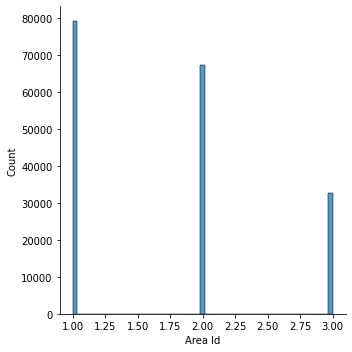

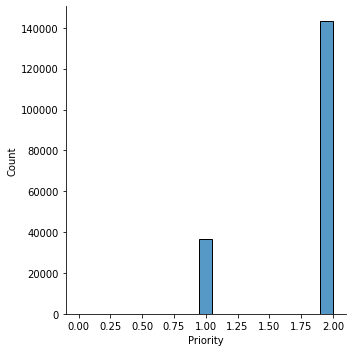

In [9]:
sns.displot(crime_data['Area Id'])
plt.show()
sns.displot(crime_data['Priority'])
plt.show()

### 3.1.2（2）盒图（离群点）

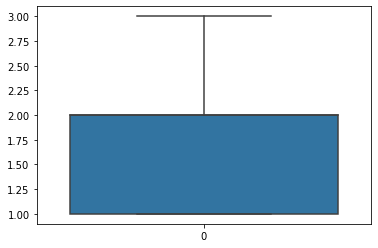

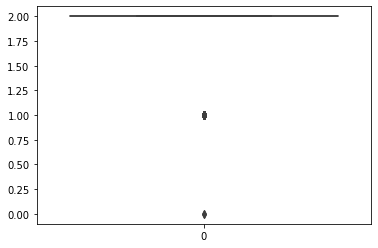

In [10]:
sns.boxplot(data=crime_data['Area Id'])
plt.show()
sns.boxplot(data=crime_data['Priority'])
plt.show()

# 3.2 数据缺失的处理


分析数据缺失原因：数据库进行数据写入时数据丢失，或者数据本身就是缺失数据，没有被统计到。<br>
因只有area_id有缺失值，这里只处理area_id，对于标称型数据，以Beat为例，通过用最高频率值的方式来进行填充


## 3.2.1 将缺失部分剔除

（1）处理前



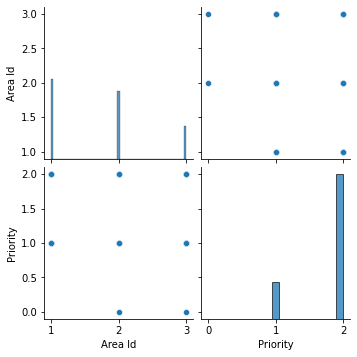

0         1.0
1         1.0
2         1.0
3         2.0
4         2.0
         ... 
180011    2.0
180012    1.0
180013    1.0
180014    2.0
180015    NaN
Name: Area Id, Length: 180016, dtype: float64
-----------------------------------------------------------------------

（2）处理后



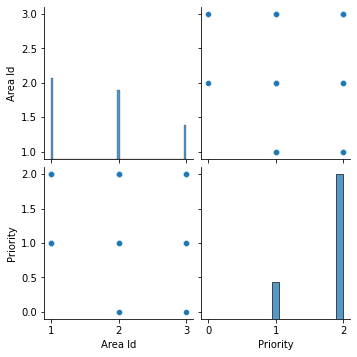

0         1.0
1         1.0
2         1.0
3         2.0
4         2.0
         ... 
180010    1.0
180011    2.0
180012    1.0
180013    1.0
180014    2.0
Name: Area Id, Length: 178771, dtype: float64


In [11]:
print("（1）处理前\n")
sns.pairplot(crime_data, vars=["Area Id", "Priority"])
plt.show()
print(crime_data['Area Id'])
print("-----------------------------------------------------------------------\n")
print("（2）处理后\n")
crime_data_after = crime_data.dropna()
sns.pairplot(crime_data_after, vars=["Area Id", "Priority"])
plt.show()
print(crime_data_after['Area Id'])

##  3.2.2 用最高频率值来填补缺失值

（1）处理前



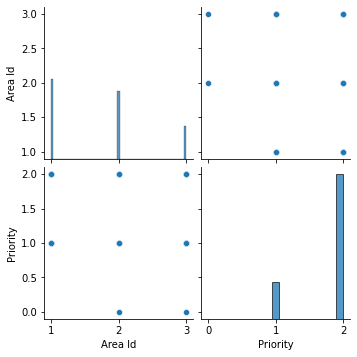

0         1.0
1         1.0
2         1.0
3         2.0
4         2.0
         ... 
180011    2.0
180012    1.0
180013    1.0
180014    2.0
180015    NaN
Name: Area Id, Length: 180016, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180016 entries, 0 to 180015
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Create Time                180015 non-null  object 
 2   Location                   180016 non-null  object 
 3   Area Id                    179112 non-null  float64
 4   Beat                       179496 non-null  object 
 5   Priority                   180015 non-null  float64
 6   Incident Type Id           180015 non-null  object 
 7   Incident Type Description  180015 non-null  object 
 8   Event Number               180015 non-null  object 
 9   Closed Time                180009 non-null  object 
dty

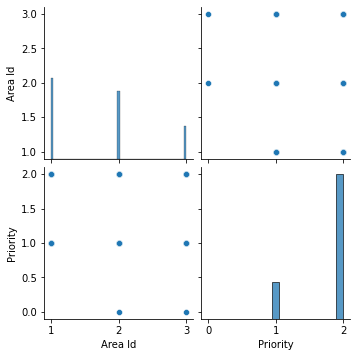

0         1.0
1         1.0
2         1.0
3         2.0
4         2.0
         ... 
180011    2.0
180012    1.0
180013    1.0
180014    2.0
180015    1.0
Name: Area Id, Length: 180016, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180016 entries, 0 to 180015
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Agency                     180015 non-null  object 
 1   Create Time                180015 non-null  object 
 2   Location                   180016 non-null  object 
 3   Area Id                    180016 non-null  float64
 4   Beat                       180016 non-null  object 
 5   Priority                   180015 non-null  float64
 6   Incident Type Id           180015 non-null  object 
 7   Incident Type Description  180015 non-null  object 
 8   Event Number               180015 non-null  object 
 9   Closed Time                180009 non-null  object 
dty

In [12]:
print("（1）处理前\n")
crime_data2 = crime_data.copy(deep=True)
sns.pairplot(crime_data2, vars=["Area Id","Priority"])
plt.show()
print(crime_data2['Area Id'])
print("\n===================\n")
crime_data2.info()
print("-----------------------------------------------------------------------\n")
print("（2）处理后\n")
crime_data2['Area Id'].fillna(crime_data2['Area Id'].mode().iloc[0],inplace=True)
crime_data2['Beat'].fillna(crime_data2['Beat'].mode().iloc[0],inplace=True)
sns.pairplot(crime_data2, vars=["Area Id","Priority"])
plt.show()
print(crime_data2['Area Id'])
print("\n===================\n")
crime_data2.info()


## 3.2.3 通过属性的相关关系来填补缺失值

（1）处理前



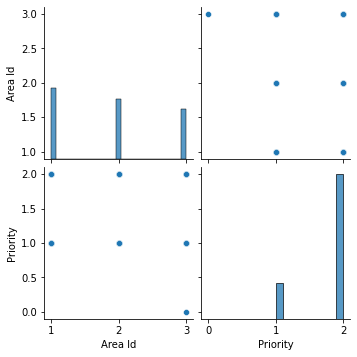

0         1.0
1         1.0
2         1.0
3         2.0
4         2.0
         ... 
119995    1.0
119996    1.0
119997    2.0
119998    1.0
119999    1.0
Name: Area Id, Length: 120000, dtype: float64
-----------------------------------------------------------------------

（2）处理后



d:\anaconda\envs\python373\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


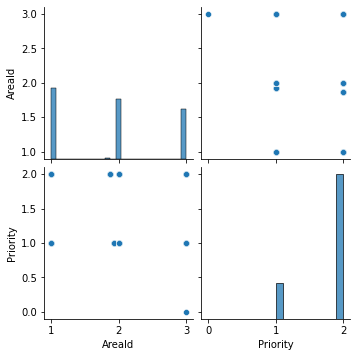

0         1.0
1         1.0
2         1.0
3         2.0
4         2.0
         ... 
119995    1.0
119996    1.0
119997    2.0
119998    1.0
119999    1.0
Name: AreaId, Length: 120000, dtype: float64


In [13]:
crime_dataY = pd.read_csv('records-for-2011-.csv')
crime_dataX = crime_dataY.copy(deep=True)
print("（1）处理前\n")
crime_data3 = crime_data.copy(deep=True)[:120000]
sns.pairplot(crime_data3, vars=["Area Id","Priority"])
plt.show()
print(crime_data3['Area Id'])
print("-----------------------------------------------------------------------\n")
print("（2）处理后\n")
def set_missing_AreaIds(df):
    # 把数值型特征都放到随机森林里面去
    AreaId_df = df[['AreaId', 'Priority']]
    known_AreaId = AreaId_df[AreaId_df.AreaId.notnull()].iloc[:,:].values
    unknown_AreaId = AreaId_df[AreaId_df.AreaId.isnull()].iloc[:,:].values
    y = known_AreaId[:, 0]  # y是AreaId，第一列数据
    x = known_AreaId[:, 1:]  # x是特征属性值，后面几列
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    # 根据已有数据去拟合随机森林模型
    rfr.fit(x, y)
    # 预测缺失值
    predictedAreaIds = rfr.predict(unknown_AreaId[:, 1:])
    # 填补缺失值
    df.loc[(df.AreaId.isnull()), 'AreaId'] = predictedAreaIds
    return df
crime_dataX = set_missing_AreaIds(crime_dataX[:120000])
sns.pairplot(crime_dataX, vars=["AreaId","Priority"])
plt.show()
print(crime_dataX['AreaId'])

## 3.2.4 通过数据对象之间的相似性来填补缺失值

（1）处理前



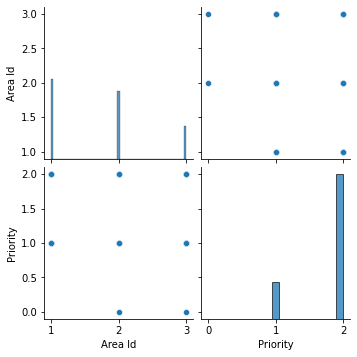

0         1.0
1         1.0
2         1.0
3         2.0
4         2.0
         ... 
180011    2.0
180012    1.0
180013    1.0
180014    2.0
180015    NaN
Name: Area Id, Length: 180016, dtype: float64
-----------------------------------------------------------------------

（2）处理后

Imputing row 1/10000 with 0 missing, elapsed time: 18.527
Imputing row 101/10000 with 0 missing, elapsed time: 18.531
Imputing row 201/10000 with 0 missing, elapsed time: 18.535
Imputing row 301/10000 with 0 missing, elapsed time: 18.538
Imputing row 401/10000 with 0 missing, elapsed time: 18.545
Imputing row 501/10000 with 0 missing, elapsed time: 18.549
Imputing row 601/10000 with 0 missing, elapsed time: 18.551
Imputing row 701/10000 with 0 missing, elapsed time: 18.553
Imputing row 801/10000 with 0 missing, elapsed time: 18.557
Imputing row 901/10000 with 0 missing, elapsed time: 18.559
Imputing row 1001/10000 with 0 missing, elapsed time: 18.561
Imputing row 1101/10000 with 0 missing, elapsed time: 18.563

In [14]:
print("（1）处理前\n")
crime_data4 = crime_data.copy(deep=True)
sns.pairplot(crime_data4, vars=["Area Id","Priority"])
plt.show()
print(crime_data4['Area Id'])
print("-----------------------------------------------------------------------\n")
print("（2）处理后\n")
new_data = crime_data4[['Area Id', 'Priority']][:10000]
fill_knn = KNN(k=3).fit_transform(new_data)
print(fill_knn)